## Final Project Submission

Please fill out:
* Student name: Lucas Fishbein
* Student pace: Flex Program
* Scheduled project review date/time: 3/10/23 1:00PM
* Instructor name: Mark Barbour
* Blog post URL:


# Overview and Business Problem


The Stakeholders of interest will be a residental home construction team within King County, WA. Their main focus will be procuring land and then constructing residental buildings for the purpose of selling them to turn a profit. These companies will want to know what features are most imporant in maximizing home values upon their sale in order to dictate where they buy land and to what standards they should build them.

The purpose of this data analysis is to build a model that will predict the price of constructed homes for a builder located in Kings County, WA. From this model, the most vaulable features of a home will be identified and from there recomendations can be given to the building team for choosing locations and making construction decisions that will maximize the value of a home.



# Data Analysis Quick Results


### Question 1: What factors coorelate most with the sale price of a home?
  
        1. Square footage of space inside the home
        2. Square footage of house apart from basement
        3. Number Of Bathrooms
        4. Price per Square Foot of space inside the house            
        5. Number of Bedrooms

### Question 2: Can we build a model to predict home prices?

Yes, a model has been built in which every feature has a significant relationship with price and accounts for 55% of the variance in the sales price, the average error of this model is about half a standard deviation. This model is a moderately good predictor and can be used to understand trends as they relate to price but should not be used as an absolute predictor.


### Question 3:  Action steps a home builder can take on in order to best increase their home's value upon sale.

#### Choosing locations to Build Upon

Choose plots with a "Fair" view but no better, next to a greenbelt.

#### Home Construction
Choose between a "Good","Better" and "Very Good"  conistruction grade. 
#### Home Presentation and Sale
Each step up in condition will net about a $50,000 increase in value.

Aim to sell homes in the months of April or May to maximize the home sale price.

# Database Understanding

A database of 30,155 home sales within King County, WA during the years 2021-2022 has been sourced from [KingCounty.gov](https://kingcounty.gov/) to build this predictive model, this data was choosen as it is the most recent and relevant data available within the stakeholder's county of interest.

This database includes a wide variety of home features that are defined below.

### Defining database columns names

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

# Data Exploration and Inspection

In [1]:
#Importing utalized Python Packages

import pandas as pd #Allows access to csv data file as well as manipulations 
import matplotlib.pyplot as plt #Creates Data visualizations
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder #Used for categorical variables encoding for regression
from statsmodels.stats.diagnostic import linear_rainbow, het_goldfeldquandt #Regression Assumption testing
from statsmodels.stats.stattools import jarque_bera #Regression Assumption testing
import scipy.stats as stats
%matplotlib inline

In [3]:
#Accessing CSV datafile stored in /data folder of repository and loading as a DataFrame

kc_data = pd.read_csv( 'data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
#Checking column datatypes
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

Most features are coded as integers, those coded as object will need to be converted to numeric values

In [5]:
#Exploring the values associated within various columns for understanding as well as checking for placeholder of coded values

#kc_data['bathrooms'].value_counts()
#kc_data['bedrooms'].value_counts()
#kc_data['waterfront'].value_counts()
#kc_data['greenbelt'].value_counts()
#kc_data['nuisance'].value_counts()
#kc_data['grade'].value_counts()
#kc_data['condition'].value_counts()
#kc_data['view'].value_counts()
#kc_data['heat_source'].value_counts()
#kc_data['sewer_system'].value_counts()
#kc_data['sqft_patio'].value_counts()
#kc_data['floors'].value_counts()
#kc_data['price'].sort_values()

# Data Cleaning and Preparation

After gaining a rough understanding of the dataset in use, the first data cleaning step is to check the dataset for duplicate values and null values as well as reformating data values into numeric terms that can be loaded into a regression model.

In [7]:
#Checking for and then removing duplicate entries

#Checking for duplicate entries via id column
kc_dups = kc_data[kc_data['id'].isin(kc_data['id'][kc_data['id'].duplicated()])].sort_values("id")

#One duplicate was found and has been removed
kc_data.drop_duplicates(subset=['id'], inplace=True)

#viewing duplicat entries
kc_dups

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long


Next each column is checked for the percentage of null values present

In [8]:
#Checking data for missing values
for col in kc_data.columns:
    percent_of_nulls = (sum(kc_data[col].isnull())/len(kc_data[col])) * 100 
    print(col, percent_of_nulls)

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
greenbelt 0.0
nuisance 0.0
view 0.0
condition 0.0
grade 0.0
heat_source 0.10612190754128806
sewer_system 0.04642833454931353
sqft_above 0.0
sqft_basement 0.0
sqft_garage 0.0
sqft_patio 0.0
yr_built 0.0
yr_renovated 0.0
address 0.0
lat 0.0
long 0.0


The heat_source column is missing 10.6% of its data points and the sewer_system is missing 4.6%, these are the only columns with null values. 

These columns are not planned to be used in the data analysis and will likely be removed, if they are used, these null values will be dealt with properly, but for now these will be ignored

### Removing Unneeded variables

Based on the question at hand it can be predetermined that some of the features of our dataset will not be utalized and therefore can be removed in order to simplify our dataframe. 

We do not care about the location of these homes as the specified dataset already created our subset by location nor do we care about yr_built, yr_renovated as that will not within our stakeholders control. All of these columns will be dropped from from our working dataframe.

In [9]:
#Dropping features that will not be useful in this analysis

kc_data.drop(columns=['id','sqft_basement', 'address',
                      'yr_renovated','lat','long',
                      'sewer_system','heat_source', 'yr_built'], inplace=True)


## Reformating existing data values 

A handful of our features are stored as objects, to deal with these categorical variables, those with boolean values will be changed to 0s and 1, those that are not boolean will be converted to coded numeric values via One-Hot Encoding

In [14]:
#Exploring dataset column datatypes
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         30086 non-null  object 
 1   price        30086 non-null  float64
 2   bedrooms     30086 non-null  int64  
 3   bathrooms    30086 non-null  float64
 4   sqft_living  30086 non-null  int64  
 5   sqft_lot     30086 non-null  int64  
 6   floors       30086 non-null  float64
 7   waterfront   30086 non-null  object 
 8   greenbelt    30086 non-null  object 
 9   nuisance     30086 non-null  object 
 10  view         30086 non-null  object 
 11  condition    30086 non-null  object 
 12  grade        30086 non-null  int64  
 13  sqft_above   30086 non-null  int64  
 14  sqft_garage  30086 non-null  int64  
 15  sqft_patio   30086 non-null  int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 3.9+ MB


All of the object datatypes will need to be changed to numeric values in order toe be used in our regression model down the line.

#### Grade

In [15]:
kc_data['grade'].value_counts()

7     11697
8      9410
9      3805
6      2858
10     1371
11      406
5       393
12      122
13       24
Name: grade, dtype: int64

Based on the information provided in the [King County Glossary of Terms](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r), grades 1-4 are considered to not be up to code and therefore should not be an aim when building new homes, so these will be excluded.

Each grade already has a number value associated with it, these values will be kept and accompanying words will be removed

In [16]:
#Altering grade values to remove string and leave column as numeric values

kc_data['grade'] = kc_data['grade'].str.split(' ', 1, expand=True)
kc_data['grade'] = kc_data['grade'].astype(int)

#Removing homes graded 1-4
kc_data = kc_data[kc_data['grade'] > 4]


AttributeError: Can only use .str accessor with string values!

#### Condition

Conditio like grade, is coded with scaled words and will be converted into numeric values

In [17]:
# Replace coded words of condition variable to numeric values
kc_data['condition'].replace({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4,'Very Good': 5}, inplace=True)
kc_data['condition'] = kc_data['condition'].astype(int)

#### Waterfront, Greenbelt and Nuisance

All three of these variables are boolean "YES" or "No" values, these will be  converted to "1" and "0", respectively.
 

In [18]:
#Converting waterfront, greenbelt and nuisance features from 'NO' or 'YES' to 0 or 1

for col in ['waterfront', 'greenbelt', 'nuisance']:
    kc_data[col].replace({'NO': 0, 'YES': 1}, inplace=True)

In [19]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30086 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         30086 non-null  object 
 1   price        30086 non-null  float64
 2   bedrooms     30086 non-null  int64  
 3   bathrooms    30086 non-null  float64
 4   sqft_living  30086 non-null  int64  
 5   sqft_lot     30086 non-null  int64  
 6   floors       30086 non-null  float64
 7   waterfront   30086 non-null  int64  
 8   greenbelt    30086 non-null  int64  
 9   nuisance     30086 non-null  int64  
 10  view         30086 non-null  object 
 11  condition    30086 non-null  int64  
 12  grade        30086 non-null  int64  
 13  sqft_above   30086 non-null  int64  
 14  sqft_garage  30086 non-null  int64  
 15  sqft_patio   30086 non-null  int64  
dtypes: float64(3), int64(11), object(2)
memory usage: 3.9+ MB


All remaining features have been converted into numerical values except the view and date features. View has multiple categorical values possible, this variable will be one hot encoded and date will be used to produce a month column and then removed.

## Engineering Data Features 

A number of features will be engineered from the existing features and then tested for their correlation with price in order to obtain the best predictor features possible for our model.


#### Month House was Sold

In [21]:
#Creating Month_sold from date sold
kc_data['date']

0         5/24/2022
1        12/13/2021
2         9/29/2021
3        12/14/2021
4         8/24/2021
            ...    
30150    11/30/2021
30151     6/16/2021
30152     5/27/2022
30153     2/24/2022
30154     4/29/2022
Name: date, Length: 30086, dtype: object

In [22]:
#Creating Month_sold from date sold and dropping date column

kc_data['date'] = kc_data['date'].str.split('/', 1, expand=True)
kc_data['month_sold'] = kc_data['date'].astype(int)

kc_data.drop(columns='date', inplace=True)

<AxesSubplot:xlabel='month_sold', ylabel='price'>

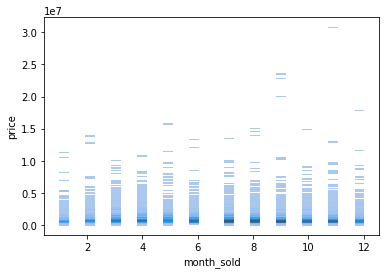

In [23]:
#Visualizing coorelations between month sold and price
sns.histplot(data=kc_data, x='month_sold', y='price')

Looks like there may be a coorelation between month sold and price. Jan has the lowest average selling price, this will act as the reference variable for one hot encoding the months for the regression.

#### Has a Patio and Has a Garage features
While there are already sqft metrics for patios and garages in this dataset, the mere presence of one of these features may be a good predictor of price.

In [24]:
#Creating Columns for the presence of either a patio or a garage.

def add_has_garage_col(row):
        if row['sqft_garage'] > 0:
            return 1
        else:
            return 0
        
kc_data['has_garage'] = kc_data.apply(lambda row: add_has_garage_col(row), axis=1)

#Adding has patio boolean column

def add_has_patio_col(row):
        if row['sqft_patio'] > 0:
            return 1
        else:
            return 0
    
kc_data['has_patio'] = kc_data.apply(lambda row: add_has_patio_col(row), axis=1)


#### Price per sqft

The value of homes is often displayed by price per sqft, so this may be a useful metric

In [25]:
#Creating a Price per sqft feature based on the square footage of living space in the home

kc_data['price_per_sqft'] = kc_data['price'] / kc_data['sqft_living']
kc_data['price_per_sqft'].describe()

count     30086.000000
mean        559.968986
std        3489.562236
min           6.920415
25%         360.615933
50%         491.755410
75%         643.776310
max      601000.000000
Name: price_per_sqft, dtype: float64

Looks like there is a potential that the price per sqft metric has some outliers when the 75th percentile is \\$644 dollars per sqft and the max value is \\$601,000 dollars per sqft

In [26]:
#Checking the top and bottom values of the price per sqft feature for possible outliers
kc_data['price_per_sqft'].sort_values()


6430          6.920415
25830         7.117730
9125         11.695703
21793        11.880603
4487         13.895640
             ...      
6125      10000.000000
23470     15073.529412
9516      15584.158416
5811      48103.448276
14977    601000.000000
Name: price_per_sqft, Length: 30086, dtype: float64

Upon a closer look at the engineered price_per_sqft feature it appears very likely that there are significant outliers within this metric, the outliers in this feature as well as other features will be dealt with in prior to our regression to create a more general training set.

## Removing Potential Outliers in Numeric variables

In [34]:
#Looking at overall dataset for possible outliers
kc_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_above,sqft_garage,sqft_patio,month_sold,has_garage,has_patio,price_per_sqft
count,3.008600e+04,30086.000000,30086.000000,30086.000000,3.008600e+04,30086.000000,30086.000000,30086.000000,30086.000000,30086.000000,30086.00000,30086.000000,30086.000000,30086.000000,30086.000000,30086.000000,30086.000000,30086.000000
mean,1.109598e+06,3.418101,2.337848,2115.704913,1.657765e+04,1.544589,0.016785,0.025660,0.174134,3.473177,7.66034,1812.450176,330.916938,217.636708,6.876886,0.669481,0.776507,559.968986
std,8.965545e+05,0.977318,0.887801,972.501664,5.889275e+04,0.567818,0.128468,0.158121,0.379231,0.700717,1.13403,877.408956,285.683178,245.268969,3.112494,0.470408,0.416593,3489.562236
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,1.000000,5.00000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.920415
25%,6.499500e+05,3.000000,2.000000,1420.000000,4.840250e+03,1.000000,0.000000,0.000000,0.000000,3.000000,7.00000,1180.000000,0.000000,40.000000,4.000000,0.000000,1.000000,360.615933
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.474500e+03,1.500000,0.000000,0.000000,0.000000,3.000000,8.00000,1560.000000,400.000000,150.000000,7.000000,1.000000,1.000000,491.755410
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.055750e+04,2.000000,0.000000,0.000000,0.000000,4.000000,8.00000,2270.000000,510.000000,320.000000,9.000000,1.000000,1.000000,643.776310
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,1.000000,1.000000,1.000000,5.000000,13.00000,12660.000000,3580.000000,4370.000000,12.000000,1.000000,1.000000,601000.000000


Looking at the description stats for this database a number of numeric values have a large descrepancy between the 75% percentile value and the max value, such as price and sqft_living. We will calculate acceptable outlier values from these metrics by calculating the interquartile range (IQR). Once the interquartile range is found, the outlier cutoffs will be calculated via the 25th and 75th percentile values using the following formulas:
> Lower Limit: q25 - 1.5 * IQR\
Upper Limit: q75 + 1.5 * IQR

In [35]:
#creating a list of variables to check for outliers
kc_outliers = ['price', 'bedrooms','bathrooms', 'sqft_living', 'sqft_lot',
                       'price_per_sqft','sqft_garage',
                      'sqft_above']

In [36]:
#Calculating outlier cutoff values using interquartile range

upper_dic={}
for column in kc_outliers:
    q100,q75, q25 = np.percentile(kc_data[column],[100,75, 25]) 
    iqr = q75-q25
    iqr
    
    lower_limit = q25 - 1.5 * iqr
    upper_limit = q75 + 1.5 * iqr
    
    #Storing each varuables 75th perctile as its own variable in a list
    upper_dic[str(column)] = q75 + 1.5 * iqr
    
    print(('The 75th percentile of', column,'is', q75, 'max value is',q100))
    print('The', column,'outlier lower limit is', lower_limit)
    print('The', column,'outlier upper limit is', upper_limit)
    print('The number of homes that are above the 75th percentile are', sum(kc_data[column] >= upper_limit))
    print()

('The 75th percentile of', 'price', 'is', 1300000.0, 'max value is', 30750000.0)
The price outlier lower limit is -325125.0
The price outlier upper limit is 2275075.0
The number of homes that are above the 75th percentile are 1993

('The 75th percentile of', 'bedrooms', 'is', 4.0, 'max value is', 13.0)
The bedrooms outlier lower limit is 1.5
The bedrooms outlier upper limit is 5.5
The number of homes that are above the 75th percentile are 635

('The 75th percentile of', 'bathrooms', 'is', 3.0, 'max value is', 10.5)
The bathrooms outlier lower limit is 0.5
The bathrooms outlier upper limit is 4.5
The number of homes that are above the 75th percentile are 883

('The 75th percentile of', 'sqft_living', 'is', 2620.0, 'max value is', 15360.0)
The sqft_living outlier lower limit is -380.0
The sqft_living outlier upper limit is 4420.0
The number of homes that are above the 75th percentile are 734

('The 75th percentile of', 'sqft_lot', 'is', 10557.5, 'max value is', 3253932.0)
The sqft_lot ou

In [37]:
#Checking created refernce dictionary for upper outlier cut-offs

upper_keys  = list(upper_dic.keys())
upper_dic

{'price': 2275075.0,
 'bedrooms': 5.5,
 'bathrooms': 4.5,
 'sqft_living': 4420.0,
 'sqft_lot': 19133.375,
 'price_per_sqft': 1068.5168749705824,
 'sqft_garage': 1275.0,
 'sqft_above': 3905.0}

In [38]:
#Applying outlier cut offs to each applicable column to create a more generalized dataset

data_no_outliers = kc_data.copy()

#Applying upper outlier cutoffs
data_no_outliers = data_no_outliers[data_no_outliers['price'] <= 2275075]
data_no_outliers = data_no_outliers[data_no_outliers['price_per_sqft'] <= 700]
data_no_outliers = data_no_outliers[data_no_outliers['price_per_sqft'] >= 100]
data_no_outliers = data_no_outliers[data_no_outliers['sqft_living'] <= 4420]

#Apply cutoffs to keep data relevant to stakehholder's goal

data_no_outliers = data_no_outliers[data_no_outliers['bedrooms'] >= 1 ] #Homes should have at least one bedroom
data_no_outliers = data_no_outliers[data_no_outliers['bathrooms'] >= 1 ]#Homes should have at least one bathroom

data_no_outliers.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_above,sqft_garage,sqft_patio,month_sold,has_garage,has_patio,price_per_sqft
count,2.351200e+04,23512.000000,23512.000000,23512.000000,2.351200e+04,23512.000000,23512.000000,23512.000000,23512.000000,23512.000000,23512.000000,23512.000000,23512.000000,23512.000000,23512.000000,23512.000000,23512.000000,23512.000000
mean,8.892604e+05,3.444964,2.307396,2053.849481,1.525571e+04,1.547380,0.009782,0.025349,0.167191,3.465422,7.542914,1758.592166,329.163023,203.391545,7.050102,0.683778,0.775519,444.294060
std,3.945986e+05,0.916737,0.763785,757.365180,4.738053e+04,0.567551,0.098422,0.157185,0.373154,0.691856,0.955848,728.020215,269.055864,222.921234,3.061802,0.465010,0.417249,132.159318
min,8.249400e+04,1.000000,1.000000,400.000000,4.120000e+02,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,390.000000,0.000000,0.000000,1.000000,0.000000,0.000000,100.221429
25%,6.100000e+05,3.000000,2.000000,1460.000000,4.800000e+03,1.000000,0.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,40.000000,5.000000,0.000000,1.000000,338.094970
50%,7.950000e+05,3.000000,2.500000,1930.000000,7.390000e+03,1.500000,0.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,400.000000,140.000000,7.000000,1.000000,1.000000,440.483494
75%,1.075000e+06,4.000000,2.500000,2540.000000,1.023125e+04,2.000000,0.000000,0.000000,0.000000,4.000000,8.000000,2201.000000,500.000000,300.000000,10.000000,1.000000,1.000000,550.740865
max,2.275000e+06,11.000000,7.500000,4420.000000,2.657160e+06,4.000000,1.000000,1.000000,1.000000,5.000000,12.000000,4550.000000,2840.000000,2880.000000,12.000000,1.000000,1.000000,700.000000


In [39]:
#how many rows were lost by removing potential outliers
len(kc_data) - len(data_no_outliers)

6574

In [40]:
#Resetting index after rows were dropped, prior to splitting df to deal with categorical and numeric variables
data_no_outliers.reset_index(drop=True, inplace=True)
data_no_outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_garage,sqft_patio,month_sold,has_garage,has_patio,price_per_sqft
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,NONE,4,7,1180,0,40,5,0,1,572.033898
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,AVERAGE,3,7,1570,0,240,12,0,1,332.129964
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,AVERAGE,3,7,1580,0,0,9,0,0,107.986111
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,AVERAGE,3,9,1090,200,270,12,1,1,358.796296
4,592500.0,2,2.0,1120,758,2.0,0,0,1,NONE,3,7,1120,550,30,8,1,1,529.017857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23507,719000.0,3,2.5,1270,1141,2.0,0,0,0,NONE,3,8,1050,200,60,10,1,1,566.141732
23508,1313000.0,3,2.0,2020,5800,2.0,0,0,0,FAIR,3,7,2020,0,520,6,0,1,650.000000
23509,800000.0,3,2.0,1620,3600,1.0,0,0,1,NONE,3,7,940,240,110,5,1,1,493.827160
23510,775000.0,3,2.5,2570,2889,2.0,0,0,0,NONE,3,8,1830,480,100,2,1,1,301.556420


#### Pulling out Numeric Variables

Here we are pulling out the numeric variables to later be recombined with the categorical variables after they are one hot encoded

In [42]:
#Getting the names of all number type columns
num_cols = data_no_outliers.select_dtypes(include=np.number).columns

#creating a numeric variable only df
kc_nums = data_no_outliers[num_cols].copy()


# One Hot Encoding Categorical Variables

The remaining non-numeric categorical variables will be One Hot Encoded to create a column for each conditional value.  To avoid colinearity issues one condition value column for each variable will be dropped and this will act the reference values when these variables are analyzed via linear regression

In [43]:
#One Hot Encoding all Categorical Variables

ohe = OneHotEncoder(sparse=False)

#Selecting Categorical Variables for analysis
kc_cats = data_no_outliers[['view','condition', 'month_sold','grade']].copy()

#Completeing OneHotEncoding in order to use categorical variables in regression
kc_cats_ohe = pd.DataFrame(
    data=ohe.fit_transform(kc_cats),
    index = data_no_outliers.index,
    columns=ohe.get_feature_names([ 'view','condition','month_sold','grade']))

#Dropping columns that will be used as reference columns for each OneHotEncoded variable
kc_cats_ohe.drop(['view_NONE', 'condition_1', 'month_sold_1','grade_5'], axis=1, inplace=True)


One Hot Encoded Dropped Columns that will act as references for regression:


    view : NONE
    condition: Poor
    month_sold: January 
    grade: Fair

 

## Recombining Numeric and One Hot Encoded categorical variables

In [44]:
#Concating One Hot encoded variables with Numeric Variables to create a working dataset

kc_working_data = pd.concat([kc_nums, kc_cats_ohe], axis=1)

#Dropping origin columns for the three variables that were one hot encoded
kc_working_data.drop(['condition','month_sold','grade'], axis=1, inplace=True)

In [45]:
#Checking to make sure concatanation was aligned properly
nan_count = kc_working_data.isna().sum()
print(nan_count) 

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
sqft_above        0
sqft_garage       0
sqft_patio        0
has_garage        0
has_patio         0
price_per_sqft    0
view_AVERAGE      0
view_EXCELLENT    0
view_FAIR         0
view_GOOD         0
condition_2       0
condition_3       0
condition_4       0
condition_5       0
month_sold_2      0
month_sold_3      0
month_sold_4      0
month_sold_5      0
month_sold_6      0
month_sold_7      0
month_sold_8      0
month_sold_9      0
month_sold_10     0
month_sold_11     0
month_sold_12     0
grade_6           0
grade_7           0
grade_8           0
grade_9           0
grade_10          0
grade_11          0
grade_12          0
dtype: int64


# Data Analysis

Now that the data has been cleaned and processed based on the parameters of our root questions and stakeholder relevance, we can begin analyzing the data to answer our business questions.


## Question 1: Identifying Factors most Highly Correlated to Home Price


In [46]:
#Calculating correlation values for each feature to price

abs(kc_working_data.corr()["price"]).sort_values(ascending=False) 

price             1.000000
sqft_living       0.691632
sqft_above        0.567499
bathrooms         0.516993
price_per_sqft    0.498227
bedrooms          0.381597
grade_9           0.367573
grade_7           0.304110
grade_10          0.287921
sqft_garage       0.273390
grade_6           0.272866
sqft_patio        0.261282
floors            0.244365
has_patio         0.203836
has_garage        0.156665
grade_8           0.148698
grade_11          0.138032
greenbelt         0.133311
view_AVERAGE      0.121436
view_GOOD         0.110335
sqft_lot          0.086214
view_EXCELLENT    0.071682
month_sold_5      0.054487
condition_2       0.053178
view_FAIR         0.047599
month_sold_4      0.037749
condition_3       0.035861
condition_4       0.035151
grade_12          0.029965
waterfront        0.027106
month_sold_9      0.025403
month_sold_12     0.025028
month_sold_11     0.023413
month_sold_6      0.018315
month_sold_2      0.017817
month_sold_10     0.017785
nuisance          0.014810
m

The features with the highest correlation values will be considered our key features for this analysis, these features will be integral to building our multilinear regression model for price predition. The key features are below.


    Features with highest Correlations to Price:
        1. sqft_living 
        2. sqft_above
        3. bathrooms
        4. price_per_sqft             
        5. bedrooms


#### Checking Key Features for relationships with Price

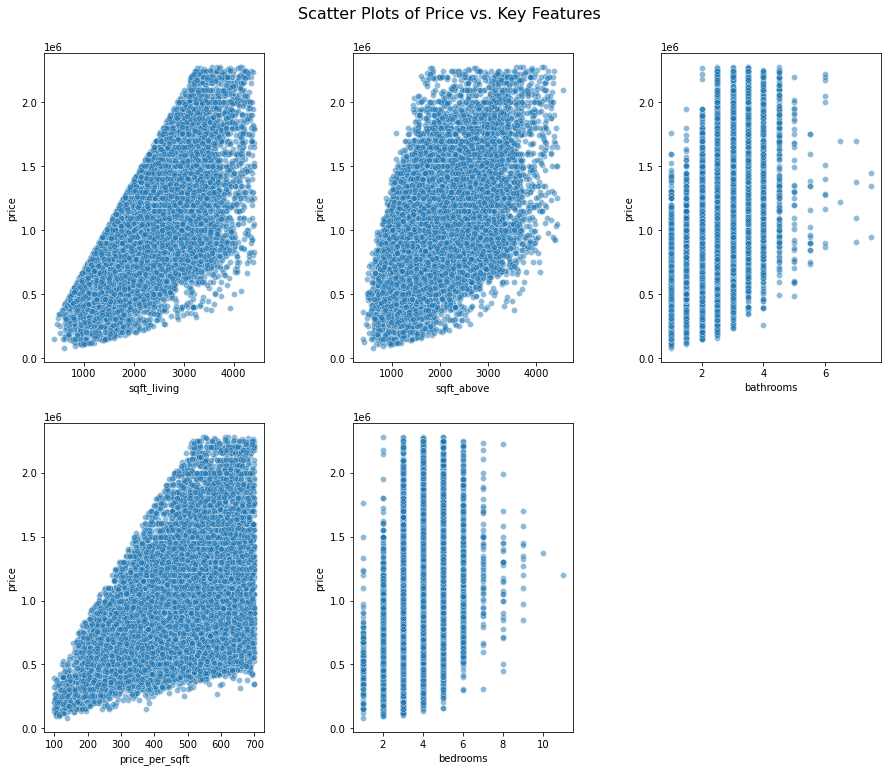

In [36]:
#Creating scatter plots for each key feature vs price

cols = ['sqft_living', 'sqft_above',  'bathrooms', 'price_per_sqft', 'bedrooms'] #defining key features

fig,ax = plt.subplots(figsize=(15,13), ncols=3, nrows=2)
fig.subplots_adjust(top=0.85)
fig.suptitle('Scatter Plots of Price vs. Key Features', y=0.9, fontsize=16)
plt.subplots_adjust(wspace = 0.4, hspace = 0.2)

for i,c in enumerate(cols):
    sns.scatterplot(x=c, y='price', ci=None, data=kc_working_data, ax=ax[i//3][i%3], alpha=0.5)  
    
fig.delaxes(ax[1][2])


All of these features seem to have linear or somewhat linear relationships with price.

## Identifying Multicollinearity Between Features

In order to satisfy the colinear assumption of linear regressions we must eliminate any highly colinear features. These will be identified and then one feature from each colinear pair will be removed prior the building the regression

<AxesSubplot:>

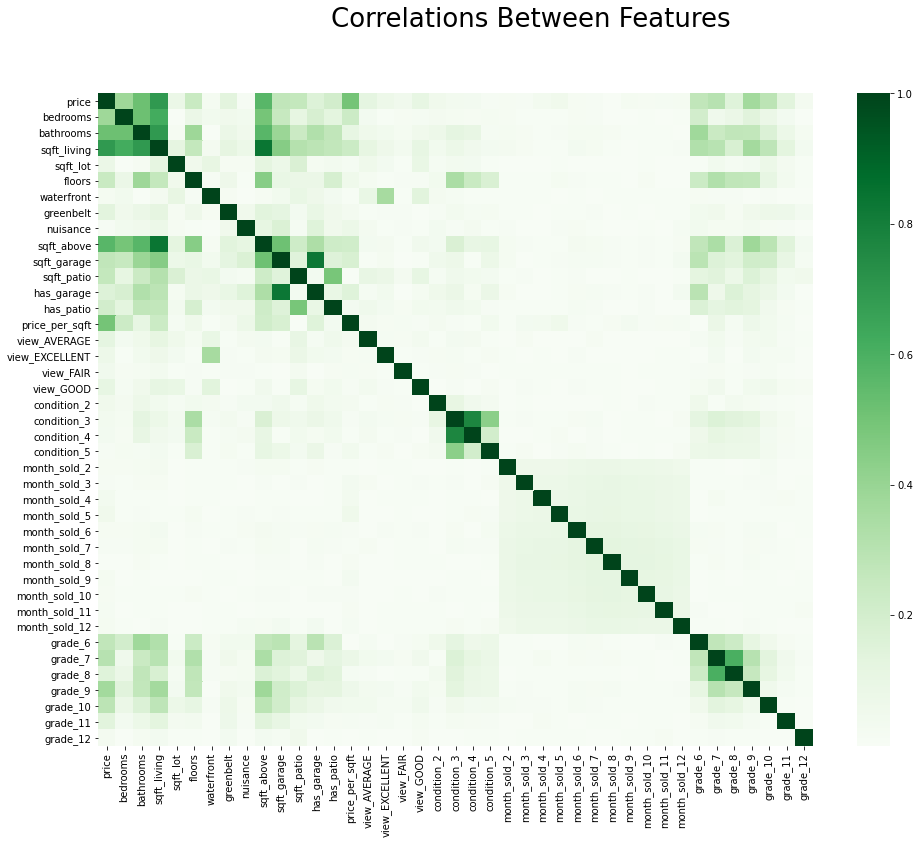

In [47]:
#Creating heatmap of correlation values between features
fig, ax = plt.subplots(figsize=(16,12))
fig.suptitle('Correlations Between Features', fontsize=26)
sns.heatmap(abs(kc_working_data.corr().abs()), cmap='Greens')

In [48]:
#Identifying factor pairs with high coliearity in order to remove one from our analysis

corr_df = kc_working_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

corr_df.set_index(['pairs'], inplace=True)

corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

corr_df.columns = ['coor']

corr_df.drop_duplicates(inplace=True)

corr_df[(corr_df.coor>.75) & (corr_df.coor<1)] 

,coor
pairs,
"(sqft_above, sqft_living)",0.837997
"(has_garage, sqft_garage)",0.831986
"(condition_4, condition_3)",0.772740


The Three pairs listed above are features that have correlation values higher than 75%. One feature from each pair must be dropped prior to our regression in order to avoid multicollinearity between features. The feature with the lower correlation to price in each pair will be dropped to assure no colinearity is present.

sqft_above and has_garage will be dropped as these have the lower coorlation with price when compared to the feature they were found to be colinear with above.

In [49]:
#Dropping one feature from colinear pairs
kc_working_data.drop(columns=['sqft_above','has_garage'], inplace=True)

#Creating New dataframe for regressions
kc_regression_data = kc_working_data.copy()

# Building the Multilinear Regression Prediction Model 

Now that we have our predictive features choosen and our data in order, the next step will be to run a simple baseline linear regression for our target feature, which in this case is Price. From there more features will be added into a multilinear regression, these features will be tested to see how they effect our model and will be added or removed based on their overall usefulness.

In order to run a proper linear regression, there are four assumptions about the data that must be taken into account and a violation of any of these 4 assumptions will cause the model to be inaccurate. Below are these assumptions and how they will be dealt with in this data analysis.

The 4 assumptions needed for a Linear Regression models are:

1. There must be a linear relationship between the target variable (price) and the predictor variable
  > This will be check visually via a scatter plotting the model residuals and to assure this assumption is met statistically, a Rainbow test will also be utalized 
        
2. There must be independence of both the features and the errors in a regression
  > Feature Independence was checked earlier via the "Identifying Multicollinearity Between Features" section above and  has already been accounted for within our data
    
3. The Residuals of the linear regression should follow a normal distribution
  > This will be checked visually via a Q-Q plot and histogram of the residuals as well as statistically via a Jarque-Bera Test
  
4. There must be homoscedasticity of errors
  >This will be checked statistically via a Goldfield-Quandt Test
    
    
Thankfully we have fairly straightforward ways of testing these assumptions for each model.
Below a function has been built to run all fo the of the assumption tests described above so that a model can be easily tested.

#### Building Function to quickly test multilinear regression assumptions

In [52]:
'''
Tests an OLS regression model for the linearity, normality and homoscedasticity assumptions of a linear regression. 

The linearity is tested visually via a scatter plot of the model's residuals vs target value and statistically tested via
a rainbow test using the linear_rainbow module.

The normalilty is tested visually via a Q-Q plot of the model's residual as well as with a histogram of the model's 
residuals. Normalilty is also tested statisticall via a Jarque-Bera Test using the jarque_bera module.

The homoscedasticity is tested via a Goldfeld-Quandt Test
'''

def model_assump_test(model_results, X, X_name, y):
    
    fig, ax = plt.subplots(ncols=3, figsize=(40,15))
    fig.suptitle('Linear Regression Assumption Testing Results for {x}'.format(x=X_name.title()), wrap=True, y=1.15, fontsize=60)

#Linearity Testing 

    #Linearity Testing via Rainbow Test
    if linear_rainbow(model_results)[1] > 0.05:
        fig.text(s=u'\u2714 Linearity Assumption passed', y=1.02, x=.4, fontsize=24)
    else:
        fig.text(s=u'\u2718 Linearity Assumption NOT passed', y=1.02, x=.4, fontsize=24)
        
    #Linearity Plot
    ax[0].scatter(x=y, y=model_results.resid)
    ax[0].axhline(y=0, color="black")
    ax[0].set_xlabel("Price", fontsize=24)
    ax[0].set_ylabel("Residuals", fontsize=24)
    ax[0].set_title("Residual Linearity Plot", fontsize=30);
        
#Normality Testing]

    #Normality of Residuals test via Q-Q plot and Jarque-Bera Test
    if jarque_bera(model_results.resid)[1] > 0.05:
        fig.text(s=u'\u2714 Normality Assumption passed', y=.99, x=.4, fontsize=24)
    else:
        fig.text(s=u'\u2718 Normality Assumption NOT passed', y=.99, x=.4, fontsize=24)
    
    #Q-Q Plot generation
    sm.graphics.qqplot(model_results.resid, dist=stats.norm, line='45', fit=True, ax=ax[1])
    ax[1].set_title('Q-Q Plot of Normality', fontsize=30)
    ax[1].set_xlabel("Theoretical Quantiles",fontsize=24)
    ax[1].set_ylabel("Sample Quantiles", fontsize=24)
    
    #Histogram of model residuals
    ax[2].set_title('Distribution of Residuals for Normality', fontsize=30)
    ax[2].set_xlabel('Model Residuals', fontsize=24)
    ax[2].set_ylabel('Count', fontsize=24)
    sns.histplot(model_results.resid, ax=ax[2], kde=True)
        
#Homoscedasticity testing 

    #Goldfeld-Quandt Test of Homoscedasticity
    if het_goldfeldquandt(y, X, alternative='two-sided')[1] > 0.05:
        fig.text(s=u'\u2714 Homoscedasticity Assumption passed', y=.96, x=.4, fontsize=24)
    else:
        fig.text(s=u'\u2718 Homoscedasticity Assumption NOT passed', y=.96, x=.4, fontsize=24)
    


## Baseling Model : Simple Linear Regression with highest correlated feature

In [53]:
#Creating a simple linear regression of sqft_living vs price
y = kc_regression_data['price'] #Target Feature
X_baseline = kc_regression_data[['sqft_living']] #Predictor features

baseline_model = sm.OLS(y, sm.add_constant(X_baseline)) #Running OLS regression model
baseline_results = baseline_model.fit() 
baseline_results.summary() #Printing out summary of model results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                 2.156e+04
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:13:03   Log-Likelihood:            -3.2868e+05
No. Observations:               23512   AIC:                         6.574e+05
Df Residuals:                   23510   BIC:                         6.574e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.492e+05   5372.352     27.763      0.000    1.39e+05     1.6e+05
sqft_living   360.3504      2.454    146.829      0.000     355.540     365.161
==============================================================================
Omnibus:                      175.692   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.372
Skew:                           0.189   Prob(JB):                     3.39e-41
Kurtosis:                       3.219   Cond. No.                     6.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Baseline OLS Linear Regression Model Results Interpretation

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The R-squared is .478 which means the model explains about 48% of the variance in price
* The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values below 0.05
* If a home had 0 sqft of living space, we would expect the sale price to be about 149,200
* For each increase of 1 sqft of living space, we expect to see an increase in sale price of about $360

This is a fairly good starting point, from here additional features will be added in order to improve the model


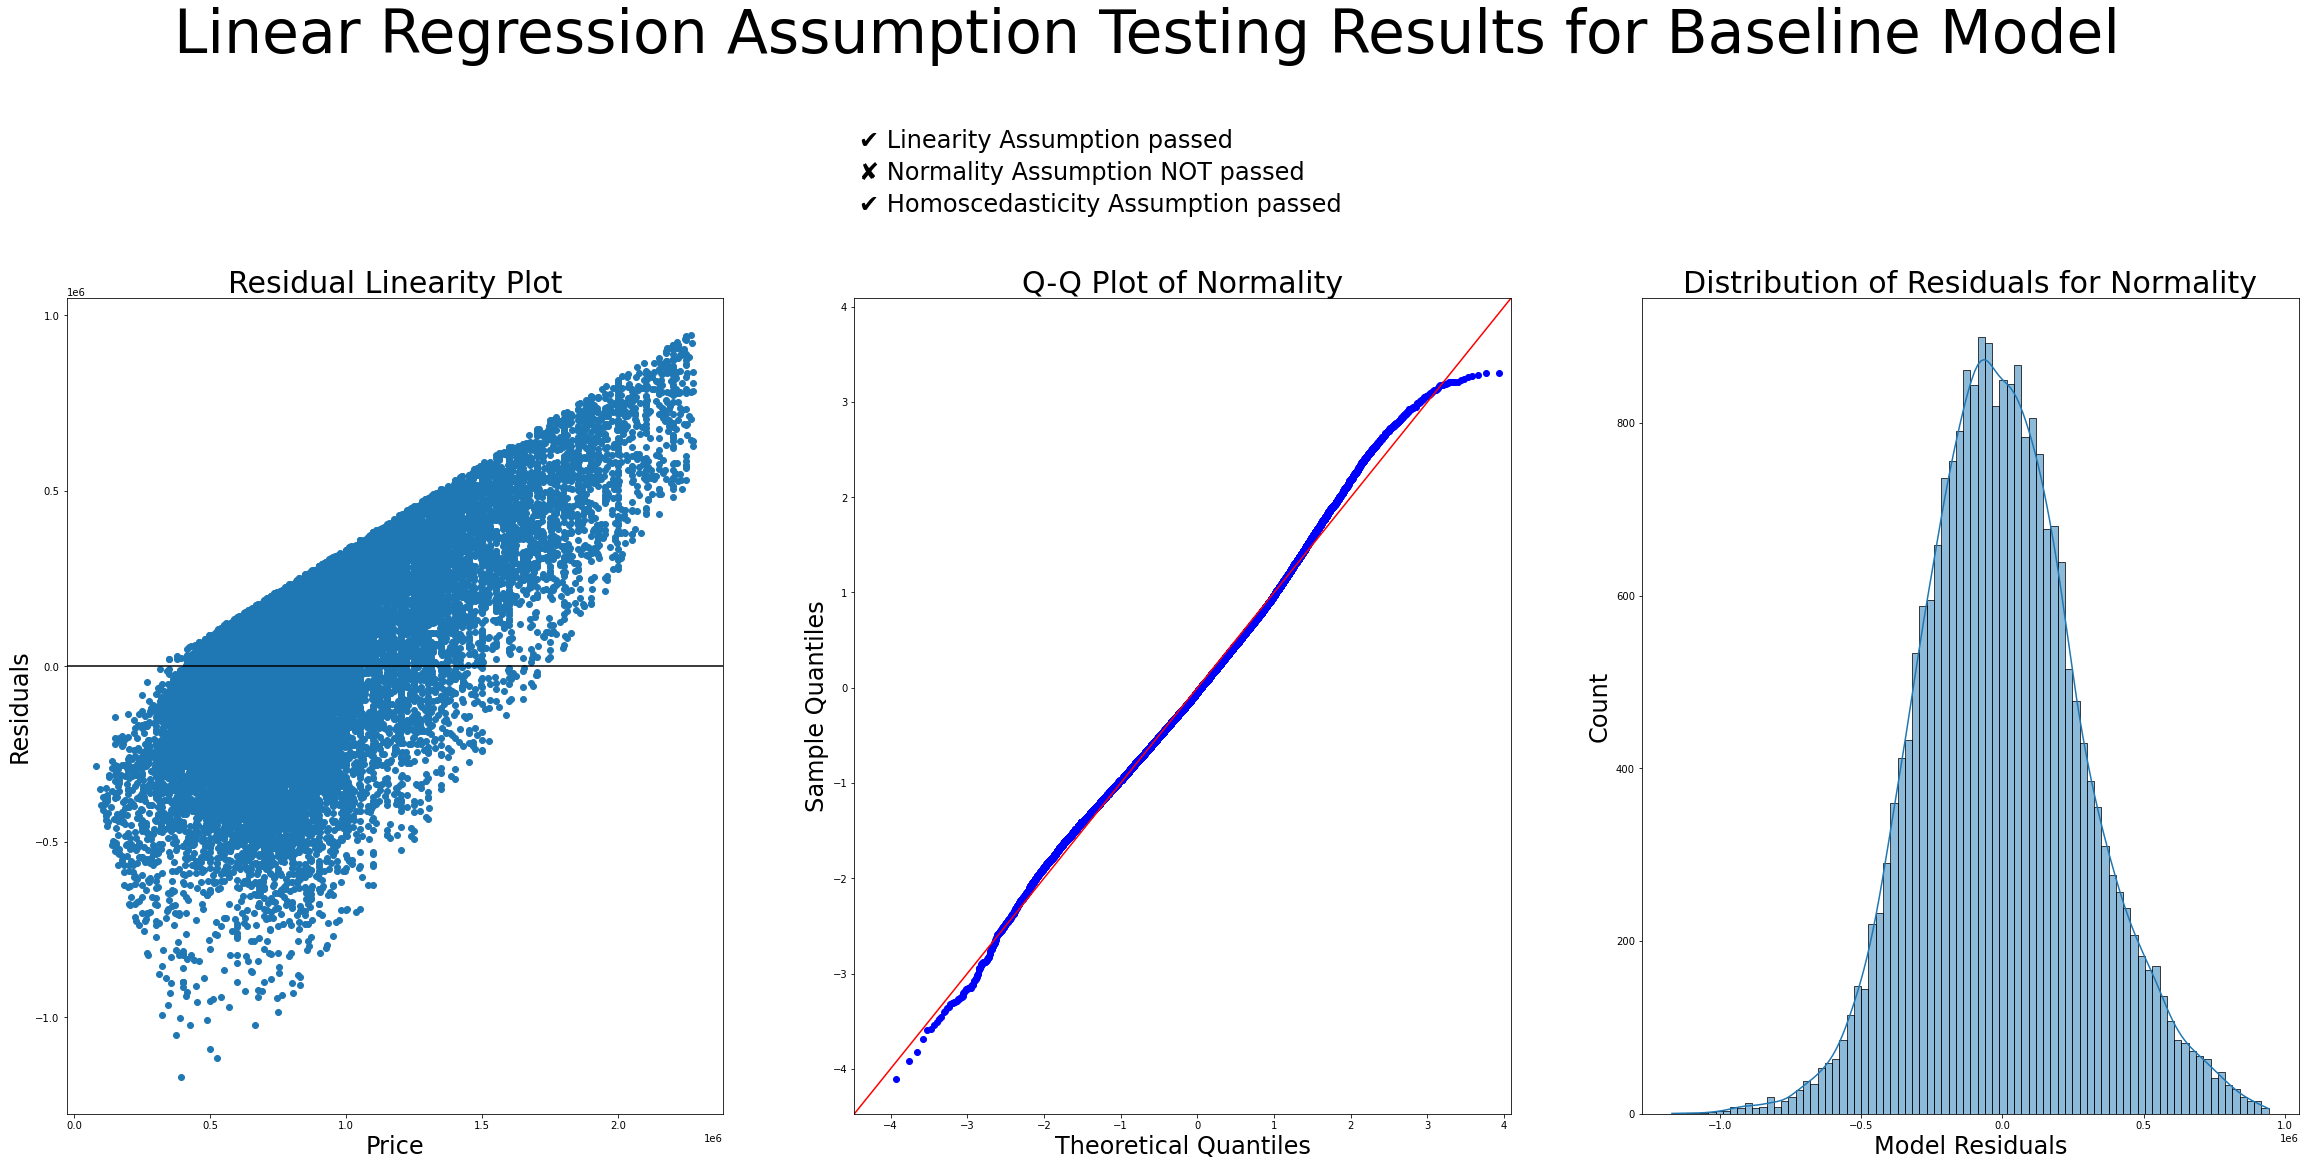

In [55]:
#Testing sqft_living Model for Linear Regression Assumptions

model_assump_test(baseline_results, X_baseline, 'Baseline Model', y)

### Baseline model Assumption tests interpretation 
Our baseline regression passes the linearity and homoscedasticity assumptions and is fairly normal but not completely normal as there is a slight skew in the distribution of the residuals. This seems like a good starting place and the model will be iterated further from here.

## Second Model : Adding Bathrooms Feature

Bathrooms was the feature that had the second highest correlation to price.

In [56]:
#Adding Bathroom feature to baseline model

y = kc_regression_data['price']
X_second_model = kc_regression_data[['sqft_living','bathrooms']]

second_model = sm.OLS(y, sm.add_constant(X_second_model))
second_results = second_model.fit()
second_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:15:18   Log-Likelihood:            -3.2862e+05
No. Observations:               23512   AIC:                         6.572e+05
Df Residuals:                   23509   BIC:                         6.573e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.174e+05   6108.592     19.212      0.000    1.05e+05    1.29e+05
sqft_living   334.7203      3.402     98.375      0.000     328.051     341.389
bathrooms     3.66e+04   3373.896     10.847      0.000       3e+04    4.32e+04
==============================================================================
Omnibus:                      198.038   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.188
Skew:                           0.200   Prob(JB):                     1.38e-46
Kurtosis:                       3.235   Cond. No.                     7.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation of Second Model

Adding the Bathrooms feature seems to have increased our R-squared value while remaining significant, this is a step in the right direction.

# Third Model: Adding Price per Sqft

Adding Third Highest correlated feature

In [57]:
#Creating a simple linear regression of sqft_living vs price

y = kc_regression_data['price']
X_third_model = kc_regression_data[['sqft_living', 'bathrooms', 'price_per_sqft']]

third_model = sm.OLS(y, sm.add_constant(X_third_model))
third_results = third_model.fit()
third_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.171e+05
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:22:03   Log-Likelihood:            -3.0377e+05
No. Observations:               23512   AIC:                         6.076e+05
Df Residuals:                   23508   BIC:                         6.076e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.491e+05   3340.294   -284.143      0.000   -9.56e+05   -9.43e+05
sqft_living      443.4742      1.212    366.027      0.000     441.099     445.849
bathrooms       1658.7030   1175.807      1.411      0.158    -645.956    3963.361
price_per_sqft  2079.0839      5.027    413.595      0.000    2069.231    2088.937
==============================================================================
Omnibus:                     2868.267   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9531.727
Skew:                          -0.620   Prob(JB):                         0.00
Kurtosis:                       5.862   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation of Third Model

Adding in the price per sqft feature has drastically pushed our R-squared value up to .937, I am fairly suspicious of this. It is very likely that this feature cannot be used in these regressions as this feature was built from the price and living_sqft features which are also present in this model.

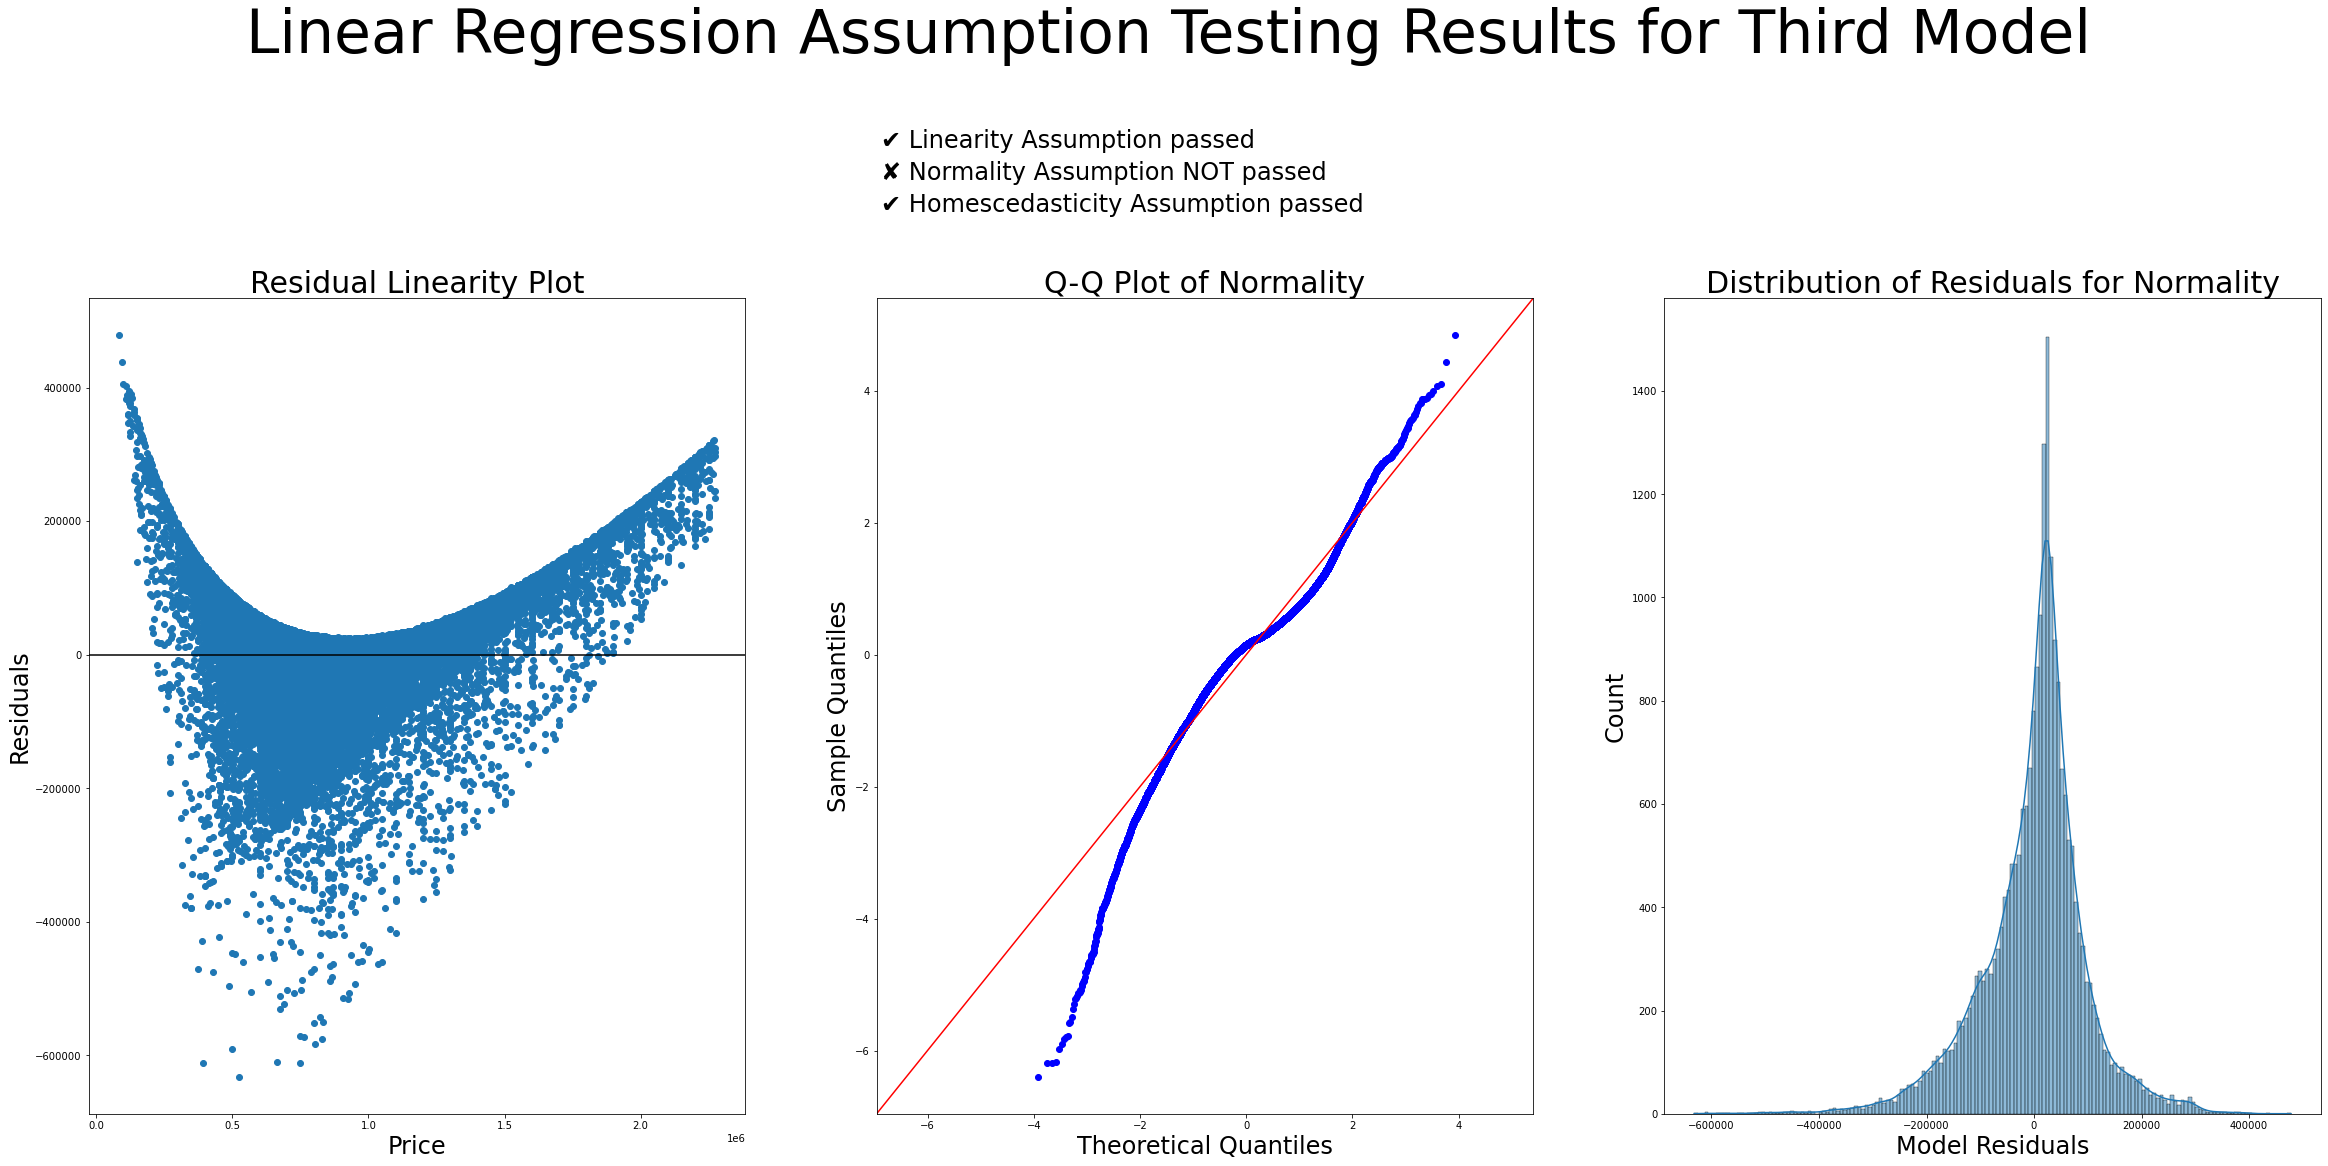

In [50]:
model_assump_test(third_results, X_third_model, 'Third Model',y)

### Interpretation of Third Model Assumptions

Based on the curve of the linearity graph on the left and the loss in normality, I am going to choose to exclude the price per sqft metric as it is likely it will only cause issues as it was derived from other variables present in the model


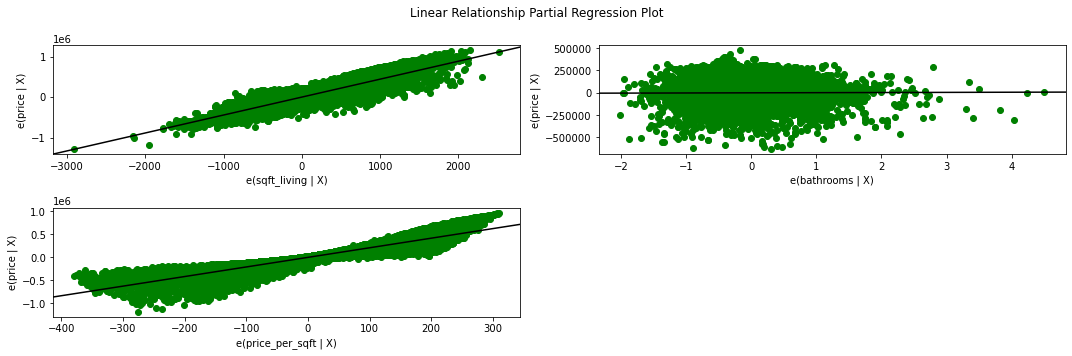

In [58]:
#Checking linearity of residuals of features indivdually 

fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(third_results, exog_idx=['sqft_living','bathrooms','price_per_sqft'], fig=fig)

# Customizing plot appearance; note that the StatsModels code actually uses .plot
# with marker 'o', so what looks like a scatter plot is a "line" internally, so
# we access it using .lines rather than .collections
for ax in fig.axes:
    ax.lines[0].set_color("green")
fig.suptitle("Linear Relationship Partial Regression Plot", fontsize="large")

plt.tight_layout()
plt.show()

### Fourth Model: Removed Price Per Sqft, added Bedrooms
Bedrooms was the forth highest correlated feature

In [60]:
#Creating a simple linear regression of sqft_living vs price

y = kc_regression_data['price']
X_forth_model = kc_regression_data[['sqft_living', 'bedrooms', 'bathrooms']]

forth_model = sm.OLS(y, sm.add_constant(X_forth_model))
forth_results = forth_model.fit()
forth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     7401.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:23:18   Log-Likelihood:            -3.2851e+05
No. Observations:               23512   AIC:                         6.570e+05
Df Residuals:                   23508   BIC:                         6.571e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.838e+05   7560.619     24.313      0.000    1.69e+05    1.99e+05
sqft_living   358.2407      3.742     95.747      0.000     350.907     365.574
bedrooms    -3.842e+04   2597.274    -14.792      0.000   -4.35e+04   -3.33e+04
bathrooms    4.421e+04   3397.633     13.013      0.000    3.76e+04    5.09e+04
==============================================================================
Omnibus:                      202.137   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.402
Skew:                           0.196   Prob(JB):                     2.28e-48
Kurtosis:                       3.265   Cond. No.                     9.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation of Fourth Model

Adding in Bedrooms slightly increased the R-squared value, for some reason this model claims that adding a bedroom subtracts from the value of the house, this feature will be left in for now but may be removed later on. 

Now that the top correlated features have been tested, lets add in the remaining features as well as the One Hot Encoded features

# Fifth Model:  Adding in remaining features

In [61]:
y = kc_regression_data['price']
X_fifth_model = kc_regression_data.drop(['price', 'price_per_sqft'], axis=1)


fifth_model = sm.OLS(y, sm.add_constant(X_fifth_model))
fifth_results = fifth_model.fit()
fifth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     803.8
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:23:24   Log-Likelihood:            -3.2671e+05
No. Observations:               23512   AIC:                         6.535e+05
Df Residuals:                   23474   BIC:                         6.538e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5665.7175   4.88e+04     -0.116      0.908   -1.01e+05       9e+04
bedrooms       -8130.6918   2540.296     -3.201      0.001   -1.31e+04   -3151.546
bathrooms       2.812e+04   3461.230      8.124      0.000    2.13e+04    3.49e+04
sqft_living      260.5135      4.181     62.307      0.000     252.318     268.709
sqft_lot           0.0270      0.038      0.720      0.471      -0.047       0.101
floors         -1.186e+04   3765.439     -3.150      0.002   -1.92e+04   -4481.209
waterfront     -3.202e+04   1.91e+04     -1.672      0.095   -6.96e+04    5514.719
greenbelt       1.256e+05   1.11e+04     11.363      0.000    1.04e+05    1.47e+05
nuisance        3.155e+04   4669.211      6.756      0.000    2.24e+04    4.07e+04
sqft_garage     -158.8953      7.661    -20.740      0.000    -173.912    -143.878
sqft_patio        20.9793      9.347      2.245      0.025       2.659      39.299
has_patio      -6178.5446   4851.887     -1.273      0.203   -1.57e+04    3331.470
view_AVERAGE    6.544e+04   7651.155      8.554      0.000    5.04e+04    8.04e+04
view_EXCELLENT  1.024e+05   2.11e+04      4.859      0.000    6.11e+04    1.44e+05
view_FAIR       9.912e+04   2.32e+04      4.266      0.000    5.36e+04    1.45e+05
view_GOOD       6.717e+04   1.19e+04      5.636      0.000    4.38e+04    9.05e+04
condition_2     6.104e+04   4.95e+04      1.232      0.218   -3.61e+04    1.58e+05
condition_3     1.127e+05   4.52e+04      2.495      0.013    2.42e+04    2.01e+05
condition_4     1.582e+05   4.52e+04      3.499      0.000    6.96e+04    2.47e+05
condition_5     2.074e+05   4.54e+04      4.568      0.000    1.18e+05    2.96e+05
month_sold_2    3.614e+04   1.16e+04      3.122      0.002    1.34e+04    5.88e+04
month_sold_3    7.488e+04   1.07e+04      6.970      0.000    5.38e+04    9.59e+04
month_sold_4    8.987e+04   1.07e+04      8.400      0.000    6.89e+04    1.11e+05
month_sold_5    1.066e+05   1.07e+04      9.995      0.000    8.57e+04    1.28e+05
month_sold_6    1.761e+04   1.03e+04      1.709      0.087   -2587.356    3.78e+04
month_sold_7    1.862e+04   1.01e+04      1.850      0.064   -1112.614    3.84e+04
month_sold_8    1.438e+04      1e+04      1.435      0.151   -5266.016     3.4e+04
month_sold_9   -3192.6595   1.02e+04     -0.313      0.754   -2.32e+04    1.68e+04
month_sold_10   1.386e+04   1.02e+04      1.352      0.176   -6227.301    3.39e+04
month_sold_11   1.053e+04   1.04e+04      1.010      0.313   -9914.729     3.1e+04
month_sold_12   7409.6149    1.1e+04      0.676      0.499   -1.41e+04    2.89e+04
grade_6          4.68e+04   1.82e+04      2.577      0.010    1.12e+04    8.24e+04
grade_7         1.336e+05   1.77e+04      7.532      0.000    9.89e+04    1.68e+05
grade_8         2.557e+05   1.83e+04     14.006      0.000     2.2e+05    2.91e+05
grade_9     

### Interpretation of Fifth Model

As expected, adding in the remaining predictors has greatly increased our adjusted R-squared value to .0558 while remaining significant overall. A number of the features were found to be non-significant, including the constant value. Those features not found to have a significant relationship with price will be removed.

## Sixth Model: Removing Non-signifcant features


In [62]:
y = kc_regression_data['price']
X_sixth_model = kc_regression_data.drop(['price', 'price_per_sqft',
                                         'has_patio','sqft_lot','waterfront',
                                         'month_sold_12','month_sold_11','month_sold_10',
                                         'month_sold_9','month_sold_8','month_sold_7',
                                         'month_sold_6','condition_2','sqft_patio'], axis=1)


sixth_model = sm.OLS(y, sm.add_constant(X_sixth_model))
sixth_results = sixth_model.fit()
sixth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1188.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:24:04   Log-Likelihood:            -3.2672e+05
No. Observations:               23512   AIC:                         6.535e+05
Df Residuals:                   23486   BIC:                         6.537e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.317e+04   2.53e+04      2.101      0.036    3567.533    1.03e+05
bedrooms       -8502.2562   2522.858     -3.370      0.001   -1.34e+04   -3557.290
bathrooms       2.795e+04   3447.467      8.107      0.000    2.12e+04    3.47e+04
sqft_living      261.8355      4.107     63.753      0.000     253.785     269.885
floors          -1.26e+04   3746.952     -3.364      0.001   -1.99e+04   -5258.882
greenbelt        1.25e+05    1.1e+04     11.314      0.000    1.03e+05    1.47e+05
nuisance        3.199e+04   4663.205      6.859      0.000    2.28e+04    4.11e+04
sqft_garage     -158.3972      7.647    -20.714      0.000    -173.385    -143.409
view_AVERAGE    6.521e+04   7578.535      8.605      0.000    5.04e+04    8.01e+04
view_EXCELLENT  9.236e+04   1.96e+04      4.713      0.000    5.39e+04    1.31e+05
view_FAIR       9.952e+04   2.32e+04      4.285      0.000     5.4e+04    1.45e+05
view_GOOD       6.691e+04   1.17e+04      5.706      0.000    4.39e+04    8.99e+04
condition_3     6.221e+04   1.91e+04      3.254      0.001    2.47e+04    9.97e+04
condition_4     1.091e+05   1.92e+04      5.680      0.000    7.15e+04    1.47e+05
condition_5     1.586e+05   1.97e+04      8.067      0.000     1.2e+05    1.97e+05
month_sold_2    2.515e+04   7914.787      3.177      0.001    9634.465    4.07e+04
month_sold_3      6.4e+04   6636.801      9.643      0.000     5.1e+04     7.7e+04
month_sold_4    7.871e+04   6554.978     12.008      0.000    6.59e+04    9.16e+04
month_sold_5    9.581e+04   6500.322     14.739      0.000    8.31e+04    1.09e+05
grade_6         4.753e+04   1.81e+04      2.619      0.009     1.2e+04    8.31e+04
grade_7         1.347e+05   1.77e+04      7.607      0.000       1e+05    1.69e+05
grade_8         2.575e+05   1.82e+04     14.143      0.000    2.22e+05    2.93e+05
grade_9         4.431e+05   1.92e+04     23.055      0.000    4.05e+05    4.81e+05
grade_10        6.213e+05   2.21e+04     28.059      0.000    5.78e+05    6.65e+05
grade_11        7.626e+05   3.61e+04     21.104      0.000    6.92e+05    8.33e+05
grade_12        5.847e+05   1.19e+05      4.910      0.000    3.51e+05    8.18e+05
==============================================================================
Omnibus:                      322.278   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              485.987
Skew:                           0.151   Prob(JB):                    2.95e-106
Kurtosis:                       3.637   Cond. No.                     1.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollineari

### Interpretation of Sixth Model

Removing the non-significant features did not change the Adjusted R-Squared value nor has it turned any other feature's p-values above 0.05.

It also changed out constant P-value to below 0.05

The issues remaining are with the bedrooms, floors and sqft_garage features, I am unable to justify why an additional bedroom or floor would reduce the value of a home, I am unsure about this predictor value and therefore will remove it. sqft_garage I have less understanding about trends and will leave it in.


## Seventh Model: Removing Bedrooms and Floors


In [63]:
y = kc_regression_data['price']
X_seventh_model = kc_regression_data.drop(['price', 'price_per_sqft',
                                         'has_patio','sqft_lot','waterfront',
                                         'month_sold_12','month_sold_11','month_sold_10',
                                         'month_sold_9','month_sold_8','month_sold_7',
                                         'month_sold_6','condition_2','sqft_patio',
                                          'bedrooms','floors'], axis=1)


seventh_model = sm.OLS(y, sm.add_constant(X_seventh_model))
seventh_results = seventh_model.fit()
seventh_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1290.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:25:00   Log-Likelihood:            -3.2673e+05
No. Observations:               23512   AIC:                         6.535e+05
Df Residuals:                   23488   BIC:                         6.537e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.941e+04   2.48e+04      1.186      0.235   -1.92e+04     7.8e+04
bathrooms       2.327e+04   3294.461      7.062      0.000    1.68e+04    2.97e+04
sqft_living      256.3673      3.596     71.301      0.000     249.320     263.415
greenbelt       1.245e+05    1.1e+04     11.271      0.000    1.03e+05    1.46e+05
nuisance        3.213e+04   4665.013      6.886      0.000     2.3e+04    4.13e+04
sqft_garage     -153.6992      7.550    -20.358      0.000    -168.497    -138.901
view_AVERAGE    6.818e+04   7554.300      9.025      0.000    5.34e+04     8.3e+04
view_EXCELLENT  9.909e+04   1.95e+04      5.068      0.000    6.08e+04    1.37e+05
view_FAIR       1.026e+05   2.32e+04      4.420      0.000    5.71e+04    1.48e+05
view_GOOD       7.134e+04   1.17e+04      6.102      0.000    4.84e+04    9.43e+04
condition_3     6.124e+04   1.91e+04      3.203      0.001    2.38e+04    9.87e+04
condition_4     1.104e+05   1.92e+04      5.746      0.000    7.27e+04    1.48e+05
condition_5     1.607e+05   1.97e+04      8.175      0.000    1.22e+05    1.99e+05
month_sold_2    2.468e+04   7917.171      3.118      0.002    9163.993    4.02e+04
month_sold_3    6.394e+04   6639.451      9.630      0.000    5.09e+04     7.7e+04
month_sold_4    7.875e+04   6557.570     12.010      0.000    6.59e+04    9.16e+04
month_sold_5    9.608e+04   6502.343     14.777      0.000    8.33e+04    1.09e+05
grade_6          4.53e+04   1.81e+04      2.497      0.013    9735.804    8.09e+04
grade_7         1.308e+05   1.77e+04      7.389      0.000    9.61e+04    1.65e+05
grade_8         2.514e+05   1.81e+04     13.885      0.000    2.16e+05    2.87e+05
grade_9         4.362e+05    1.9e+04     22.949      0.000    3.99e+05    4.73e+05
grade_10        6.167e+05   2.19e+04     28.162      0.000    5.74e+05     6.6e+05
grade_11        7.606e+05    3.6e+04     21.153      0.000     6.9e+05    8.31e+05
grade_12        5.855e+05   1.19e+05      4.917      0.000    3.52e+05    8.19e+05
==============================================================================
Omnibus:                      317.530   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.708
Skew:                           0.155   Prob(JB):                    1.01e-102
Kurtosis:                       3.619   Cond. No.                     1.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation of Seventh Model

Removing Bedrooms and floors did not effect the adjusted R-squared value, but the constant value is again insignificant. I am fairly happy with this model so far and now will check to be sure all of the multilinear regression assumptions are met, before attempt to deal with the insignificant constant value


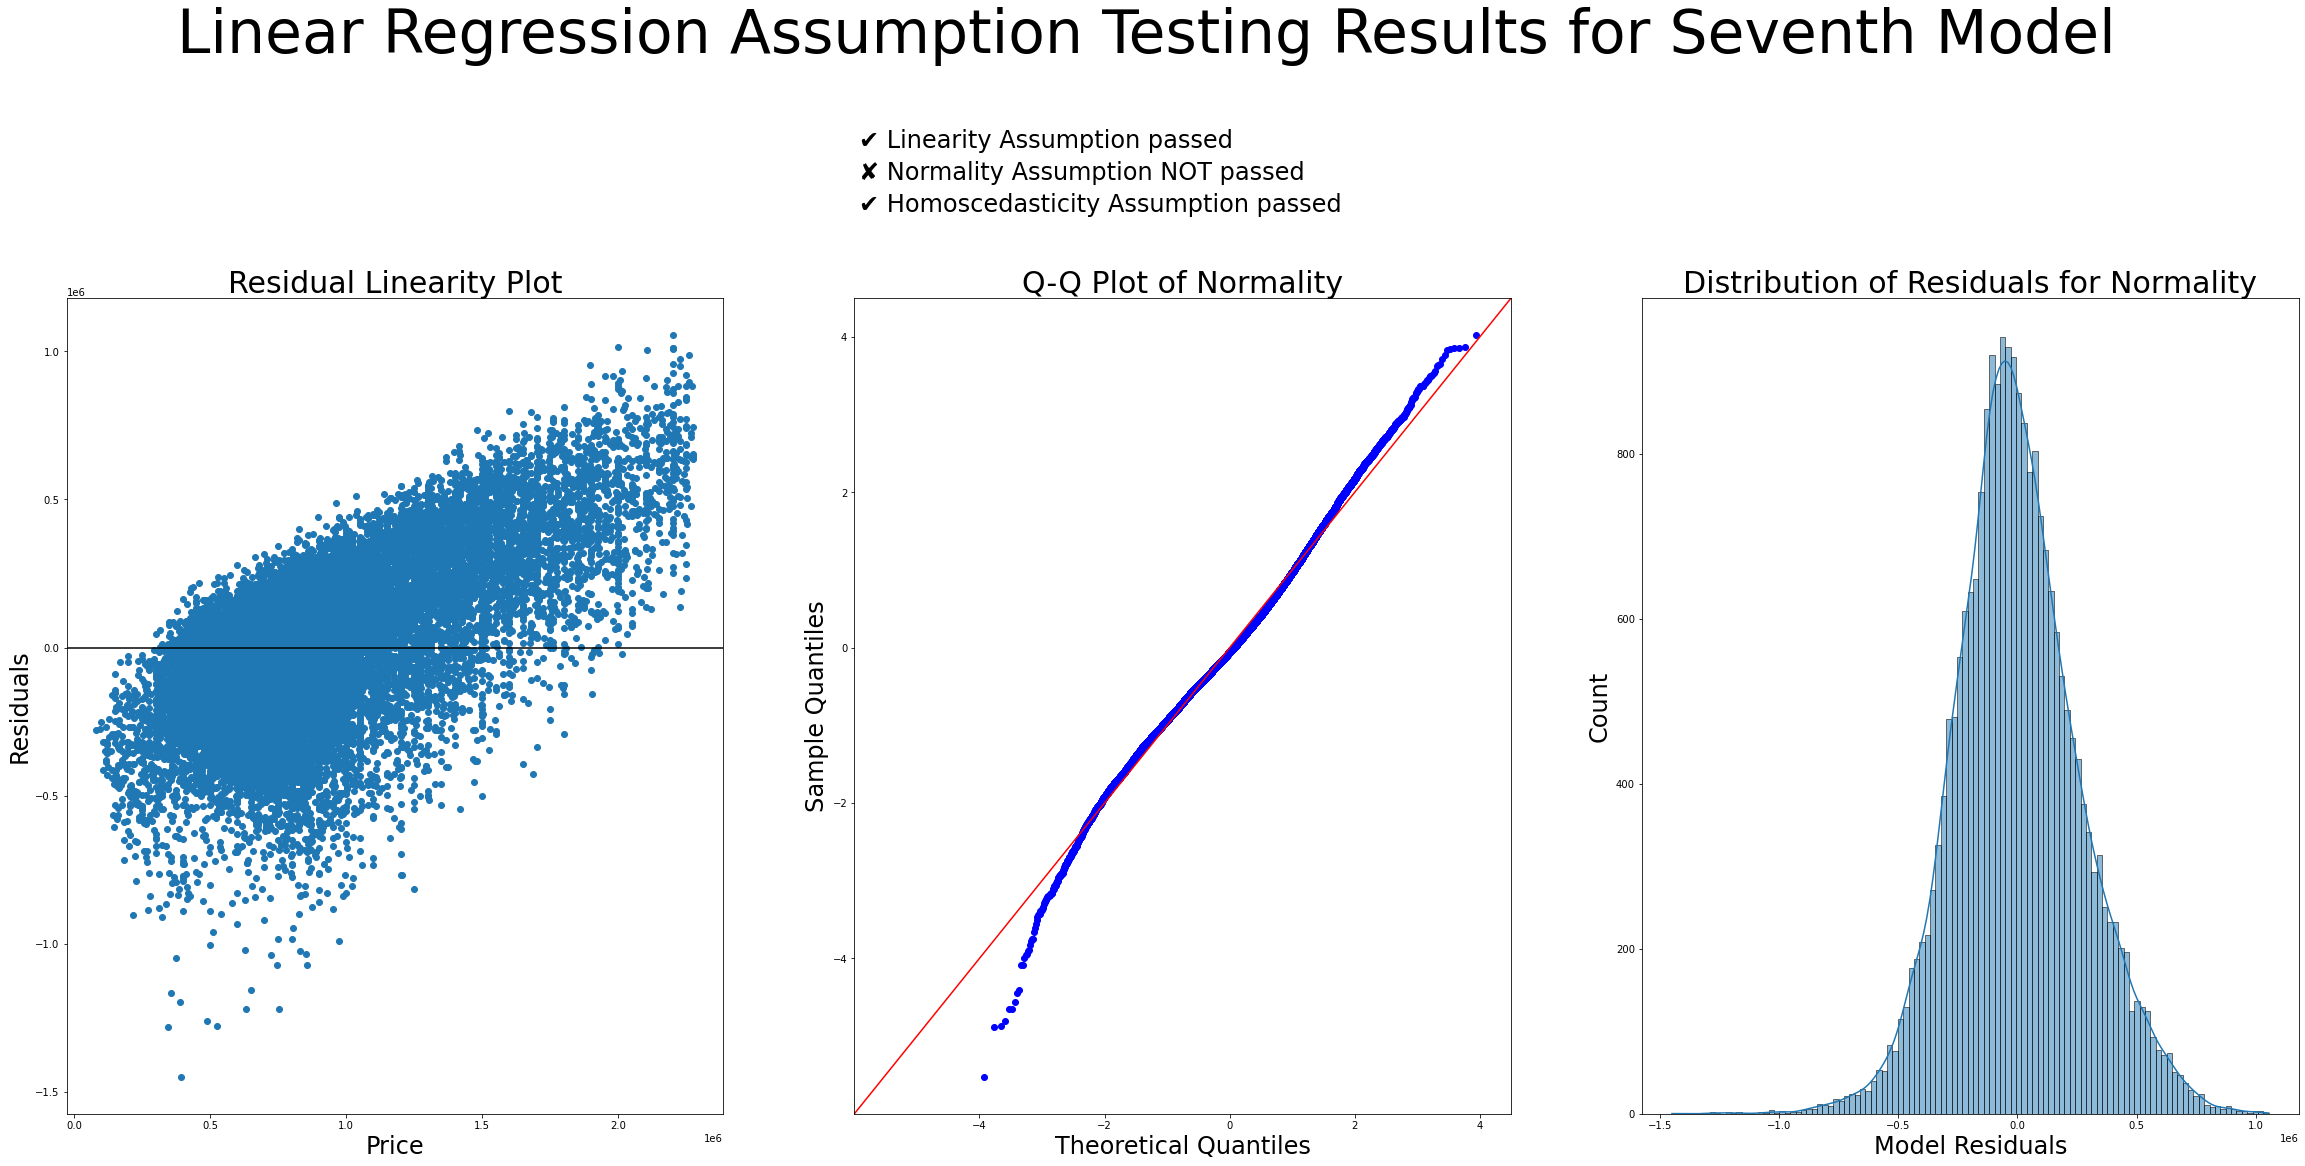

In [64]:
model_assump_test(seventh_results, X_seventh_model, 'Seventh Model', y)

### Seventh Model Assumptions
This model passes the Linearity assumption as well as the homescedasticity assumption but there are issues with the normality of the residuals. These normality issues do not seem to be huge issues as visually the Q-Q plot and histogram of model residuals both look very close to normal.

In an attempt to fix the normality issue, we will look at the distributions of all of the continuous features and log transform those that will benefit from a log transformation.


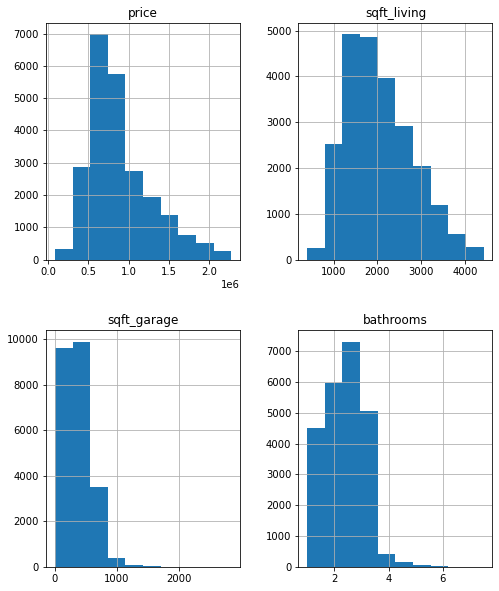

In [65]:
#Checking Normality of continous variables

seventh_vars = [['price', 'sqft_living', 'sqft_garage', 'bathrooms']]
for col in seventh_vars:
    kc_regression_data[col].hist(figsize=(8, 10));


Text(0.5, 0, 'bathrooms')

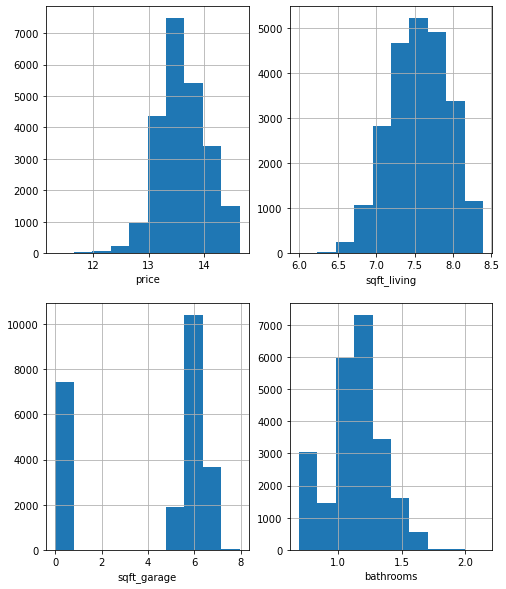

In [66]:
#Log transformed continous variables

fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(8,10))
np.log(kc_regression_data["price"]).hist(ax = ax[0][0])
ax[0][0].set_xlabel("price")

np.log(kc_regression_data["sqft_living"]).hist(ax = ax[0][1])
ax[0][1].set_xlabel("sqft_living")

np.log1p(kc_regression_data['sqft_garage']).hist(ax = ax[1][0]); #log1p used as there are '0' values in this feature
ax[1][0].set_xlabel("sqft_garage")

np.log1p(kc_regression_data['bathrooms']).hist(ax = ax[1][1]);
ax[1][1].set_xlabel("bathrooms")



After the log transformation, sqft_living and sqft_garage became more normal in shape. Therefore these transformations will be applied to the regression. 

In [67]:
#Creating log transformed columns
kc_regression_data['log_sqft_garage'] = np.log1p(kc_regression_data['sqft_garage'])
kc_regression_data['log_sqft_living'] = np.log(kc_regression_data['sqft_living'])

## Eighth Model: Adding Log Transformed Sqft Garage and Sqft Living

In [68]:
y = kc_regression_data['price']
X_eighth_model = kc_regression_data.drop(['price', 'price_per_sqft',
                                         'has_patio','sqft_lot','waterfront',
                                         'month_sold_12','month_sold_11','month_sold_10',
                                         'month_sold_9','month_sold_8','month_sold_7',
                                         'month_sold_6','condition_2','sqft_patio',
                                          'bedrooms','floors','sqft_living','sqft_garage'], axis=1)


eighth_model = sm.OLS(y, sm.add_constant(X_eighth_model))
eighth_results = eighth_model.fit()
eighth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1246.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:28:18   Log-Likelihood:            -3.2695e+05
No. Observations:               23512   AIC:                         6.539e+05
Df Residuals:                   23488   BIC:                         6.541e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.019e+06   5.39e+04    -56.041      0.000   -3.12e+06   -2.91e+06
bathrooms        2.896e+04   3338.742      8.674      0.000    2.24e+04    3.55e+04
greenbelt        1.263e+05   1.11e+04     11.330      0.000    1.04e+05    1.48e+05
nuisance         3.567e+04   4704.035      7.582      0.000    2.64e+04    4.49e+04
view_AVERAGE     7.245e+04   7622.876      9.504      0.000    5.75e+04    8.74e+04
view_EXCELLENT    1.09e+05   1.97e+04      5.526      0.000    7.04e+04    1.48e+05
view_FAIR        1.058e+05   2.34e+04      4.512      0.000    5.98e+04    1.52e+05
view_GOOD        8.134e+04   1.18e+04      6.896      0.000    5.82e+04    1.04e+05
condition_3      5.972e+04   1.93e+04      3.093      0.002    2.19e+04    9.76e+04
condition_4      1.033e+05   1.94e+04      5.326      0.000    6.53e+04    1.41e+05
condition_5       1.55e+05   1.98e+04      7.811      0.000    1.16e+05    1.94e+05
month_sold_2      2.44e+04   7992.340      3.052      0.002    8729.506    4.01e+04
month_sold_3     6.093e+04   6702.850      9.090      0.000    4.78e+04    7.41e+04
month_sold_4     7.688e+04   6620.193     11.613      0.000    6.39e+04    8.99e+04
month_sold_5      9.46e+04   6564.724     14.411      0.000    8.17e+04    1.07e+05
grade_6          7248.5083   1.84e+04      0.395      0.693   -2.87e+04    4.32e+04
grade_7          5.858e+04    1.8e+04      3.250      0.001    2.33e+04    9.39e+04
grade_8          1.815e+05   1.85e+04      9.819      0.000    1.45e+05    2.18e+05
grade_9          3.876e+05   1.94e+04     20.017      0.000     3.5e+05    4.26e+05
grade_10         5.922e+05   2.21e+04     26.789      0.000    5.49e+05    6.36e+05
grade_11         7.637e+05   3.62e+04     21.121      0.000    6.93e+05    8.35e+05
grade_12         5.721e+05    1.2e+05      4.761      0.000    3.37e+05    8.08e+05
log_sqft_garage -1.241e+04    682.183    -18.187      0.000   -1.37e+04   -1.11e+04
log_sqft_living  4.801e+05   7191.946     66.757      0.000    4.66e+05    4.94e+05
==============================================================================
Omnibus:                      393.994   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              511.182
Skew:                           0.232   Prob(JB):                    9.96e-112
Kurtosis:                       3.553   Cond. No.                         640.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Eighth Model Regression Results


* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 55% of the variance in sales price
* grade_6's p-value is not significant and leading me to believe that there is no direct relationship with price. This will be removed
* Our Constant value has become significant


This is an accepatable R-squared and at this point all of the variables that it makes sense to include in the regression have been included.

## Ninth Model: Removing Grade_6

In [70]:
y = kc_regression_data['price']
X_ninth_model = kc_regression_data.drop(['price', 'price_per_sqft',
                                         'has_patio','sqft_lot','waterfront',
                                         'month_sold_12','month_sold_11','month_sold_10',
                                         'month_sold_9','month_sold_8','month_sold_7',
                                         'month_sold_6','condition_2','sqft_patio',
                                          'bedrooms','floors','sqft_living',
                                         'sqft_garage','grade_6'], axis=1)


ninth_model = sm.OLS(y, sm.add_constant(X_ninth_model))
ninth_results = ninth_model.fit()
ninth_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1303.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:29:07   Log-Likelihood:            -3.2695e+05
No. Observations:               23512   AIC:                         6.539e+05
Df Residuals:                   23489   BIC:                         6.541e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.014e+06   5.25e+04    -57.449      0.000   -3.12e+06   -2.91e+06
bathrooms        2.894e+04   3338.242      8.669      0.000    2.24e+04    3.55e+04
greenbelt        1.263e+05   1.11e+04     11.328      0.000    1.04e+05    1.48e+05
nuisance         3.568e+04   4703.869      7.584      0.000    2.65e+04    4.49e+04
view_AVERAGE     7.241e+04   7622.161      9.500      0.000    5.75e+04    8.73e+04
view_EXCELLENT   1.089e+05   1.97e+04      5.520      0.000    7.02e+04    1.48e+05
view_FAIR        1.058e+05   2.34e+04      4.513      0.000    5.98e+04    1.52e+05
view_GOOD        8.129e+04   1.18e+04      6.892      0.000    5.82e+04    1.04e+05
condition_3      6.017e+04   1.93e+04      3.123      0.002    2.24e+04    9.79e+04
condition_4      1.038e+05   1.94e+04      5.358      0.000    6.58e+04    1.42e+05
condition_5      1.555e+05   1.98e+04      7.851      0.000    1.17e+05    1.94e+05
month_sold_2     2.439e+04   7992.196      3.052      0.002    8729.384    4.01e+04
month_sold_3     6.091e+04   6702.531      9.087      0.000    4.78e+04     7.4e+04
month_sold_4     7.688e+04   6620.074     11.613      0.000    6.39e+04    8.99e+04
month_sold_5      9.46e+04   6564.590     14.410      0.000    8.17e+04    1.07e+05
grade_7          5.195e+04   6582.282      7.893      0.000    3.91e+04    6.49e+04
grade_8          1.748e+05   7534.432     23.199      0.000     1.6e+05     1.9e+05
grade_9          3.809e+05   9329.107     40.833      0.000    3.63e+05    3.99e+05
grade_10         5.854e+05   1.41e+04     41.645      0.000    5.58e+05    6.13e+05
grade_11         7.569e+05   3.19e+04     23.757      0.000    6.94e+05    8.19e+05
grade_12         5.654e+05   1.19e+05      4.754      0.000    3.32e+05    7.99e+05
log_sqft_garage  -1.24e+04    681.958    -18.183      0.000   -1.37e+04   -1.11e+04
log_sqft_living  4.803e+05   7176.669     66.924      0.000    4.66e+05    4.94e+05
==============================================================================
Omnibus:                      393.373   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              510.351
Skew:                           0.232   Prob(JB):                    1.51e-111
Kurtosis:                       3.553   Cond. No.                         632.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

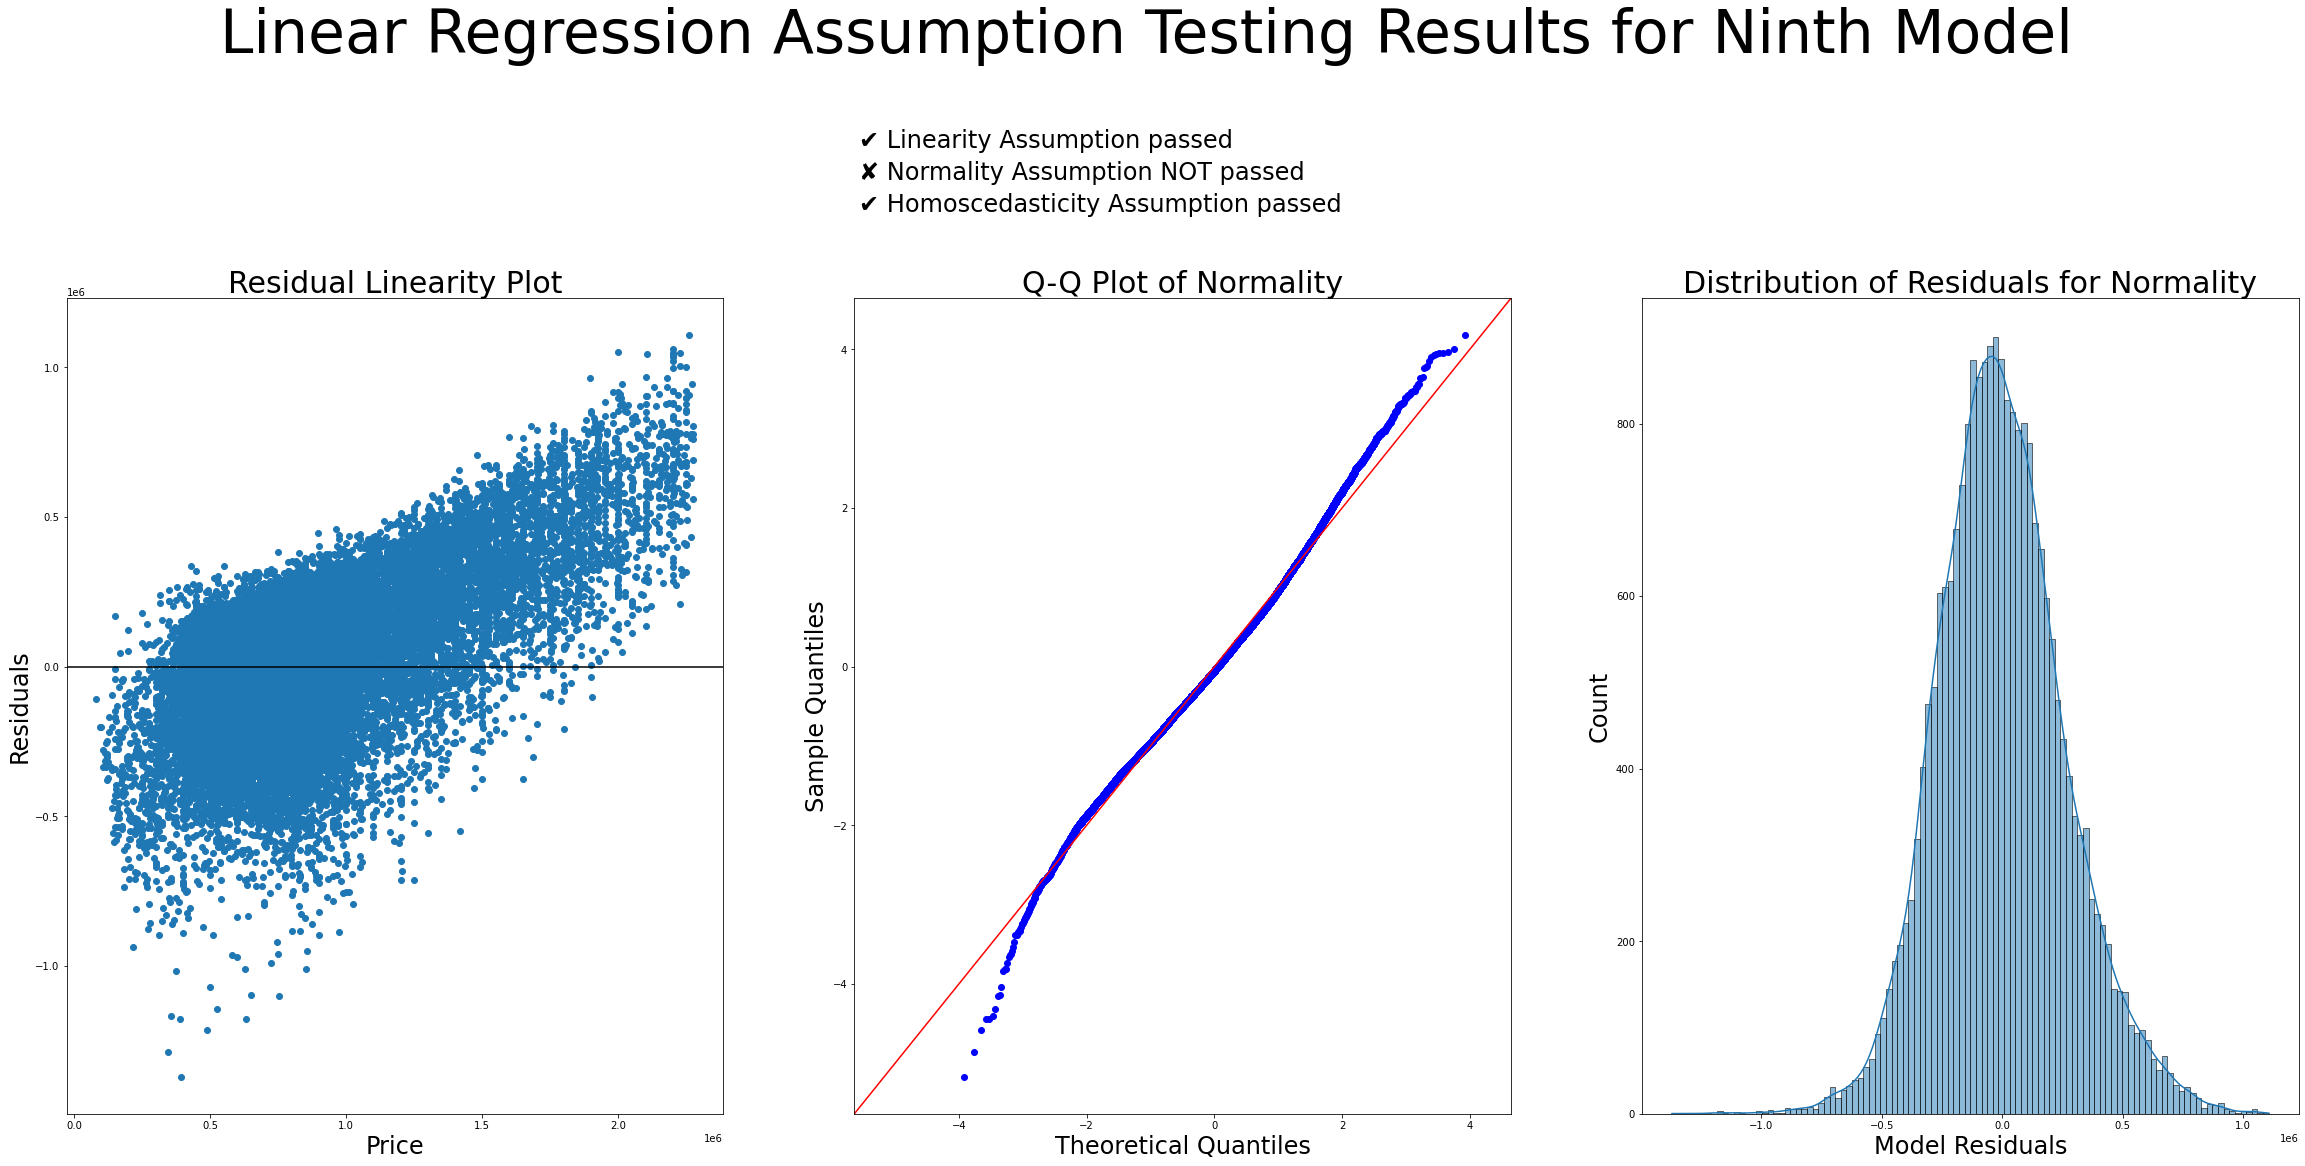

In [71]:
model_assump_test(ninth_results, X_ninth_model, 'Ninth Model', y)

## Evaluating Final Model based on Mean Absolute Error

In [72]:
#Calculating Mean Absolute Error 
mae = ninth_results.resid.abs().sum() / len(y)
print('MAE: The model is off by about',mae ,'dollars on a given prediction.')


MAE: The model is off by about 206881.3085163028 dollars on a given prediction.


In [73]:
#Calculating Number of standard deviations of error in model
mae/kc_regression_data['price'].std()

0.5242829786706641

While an MAE of 206,000 sounds very large that value only equates to about half of a standard of price in this dataset. While ideally we would have a smaller average error, half of an STD is acceptable to allow us to gain adequate information in order to give proper recomendations to the stakeholders about pricing trends within the dataset


## Interpreting Final Model


* Our model explains about 55% of the variance in home price throughout this dataset.
* The overall model is significant based on a 0.05 alpha level.
* All of the coefficeints relationship's to price are significant, in other words a relationship between the feature and price exists 
* This model passes the Linearity and Homoscedasticity Assumptions
* Model has a Low condition number, meaning multicollinearity between features is very unlikely
* While the Residuals are not completely normal, they are fairly normal as can been seen in the Q-Q plot and histogram of residuals, while breaking this assumption is not ideal, it is acceptable in a model of this nature.
* The average error of this model is about half of a standard deviation in price, or about 200,000 dollars



### Interpreting Model Coefficents

#### GreenBelt:
>Being adjacent to a greenbelt provided an increase in overall value of about $126,000.

When deciding where to build a new construction, being next to a greenbelt should be highly considered 

#### Nuisance:
>The homes having reported traffic noise or some other nuisance was assocaited with an overall increase of $36,000

Although it may seem counterintuitive, areas with noise or other nuisances seem to increase a home's value. This could be for a variety of reasons such as the noise being related to being in a heavily populated area. While the types of nuisances are not specified in this dataset, heavy traffic noise or other small inconviences should not wholly deter construction, but I would have troubling making a solid recomendation based on this metric without further information on the types of nuisances accounted for in this dataset. 

#### View:
>Having a view overall increased the value of a home but the quality of the view did not relate to home price increase in the most intuiative way. A fair view, the lowest quality of view, increased the value of a home by about \\$106,000 compared with no view, which was greater than the increase for an average view. Excellent views still added the most value by a small margine when compared with no view at a \\$108,000 increase.

Based on these results, I would recommend construction in areas with fair rated views, as these will likely be on cheaper land compared to areas with better views but will still create a very large home value increase.

#### Grade:
> The value associated with an increase in construction grade basically acted as expected with higher grades fetching higher prices. The breakdown of price increases for each grade when compared with a Fair graded house was \\$52,000 for an Average grade, \\$175,000 for Good, \\$381,000 for Better, \\$585,000 for Very Good, \\$565,000 for Luxury amd \\$757,000 for Mansion grade construction 

When constructing a home choosing a high grade of construction could be very beneficial and a cost/benefit analysis should be run to decide exactly what construction grade should be choosen. This model suggests that while better materials and craftsmanship will be a larger investment, it could be worth it for a steep home value increase, except in the case of Luxury homes as these are valued less than the Very Good grade


#### Sqft of living space:
> sqft_living was log transformed and therefore the interpretation of this of metric is that a 1% increase in sqft inside the home is associated with an increase in value of 480,000/100 or about $4,800 in home value  

The results of this analysis seem to suggest that you will have a higher percent increase in home value when adding square footage to smaller homes. It is important to think of construction costs when considering this and a specific cost-benefit analysis should be used before blindly increasing square footage.

#### Sqft of Garage Space:
>sqft_garage was log transformed and therefore the interpretation of this of metric is that a 1% increase in sqft of the garage is associated with a decrease in value of 12,000/100 or about $1,200 in home value  

While this may seem counter intuitive this may be for a variety of reasons that are not represented in this data, such as a home in the city may be of more value but not have garage space. Independent of the reasoning, this model suggests that you should not waste time or resources on building an excessive garage


#### Condition:
>As expected as the condition of a home increases, so does the value. An increase from a condition of poor to average resulted in a \\$60,000, poor to good was \\$103,000, and poor to excellent was $155,000

Increasing the overall condition of the house either through cleaning, repainting or other types of home maintence based on this model is one of the most effective ways to increase its value as each step up in condition, not including from poor to fair, will result in an increase of around at least $40,000.

#### Month sold:
> When comparing to a sale in janurary, the months that are associated with the highest increase in sales value are March, April and May with an associated increase of \\$61,000, \\$77,000 and \\$ 95,000 respectively

Many of the months could not be spoken on as it seems that a sale during that month did not correlate to price in a reliable way. With the data we do have a sale is recommended for April or May




# Conclusions and Recommendations


### Choosing locations to Build Upon

When looking for land we are looking for the cheapest property that will provide great home value, for this we recommend searching for a "Fair" view but no better, next to a greenbelt as these will raise the value of a home on average about \\$106,000 and \\$126,000 respectively.

### Home Construction

Increasing the construction grade will generally increase its value significantly but will also raise investment costs, for this reason we recommend choosing between a "Good","Better" and "Very Good" grade. We suggest running a cost/benefit analysis and choosing which of these options works best for your situation. 

### Home Presentation and Sale

When placing the home up for sale we recommend you spend a little extra to make sure it is in good condition as each step up in condition will net you around $50,000 in value, this could be as simple as cleaning and repainting and would provided a great return on investment.

We recommend trying to sell homes in the months of April or May to maximize the home sale price, choosing these months could net you around $80,000 more dollars when compared to selling the same house in another month.



# Limitations